# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.info()
#Посмотрим общую информацию о типе данных и количесте пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating  16715 non-null  object
dtypes: object(1)
memory usage: 130.7+ KB


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

In [2]:
pd.set_option('display.max_columns', None)
df.head()
#Посмотрим первые 5 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


 <div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой
			
	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Спасибо большое!
</div>

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

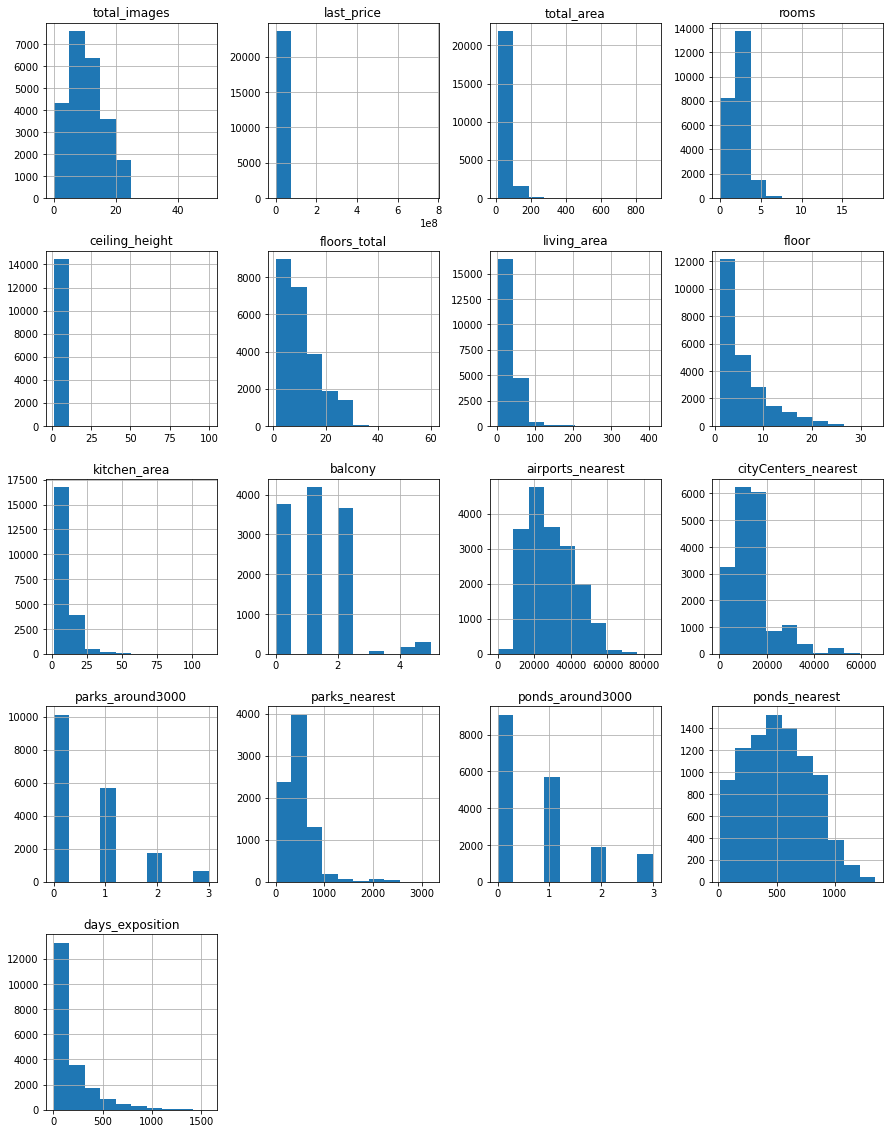

In [3]:
df.hist(grid=True, figsize=(15, 20))
#Построим общую гистограмму

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Спасибо, данная возможность очищает тетрадь от ненужных данных!
</div>

#### Вывод по общей информации

Просматривая общие данные можно заметить "странности" в данных. 
1. У столбца first_day_exposition необходимо поменять тип данных на datetime;
2. В столбце balcony при отсутсвии балкона есть значения "О" и так же "NaN", так же следует изменить тип данных на int64;
3. В столбце ceiling_height высота потолков большое количество пропусков, значение не может быть нулевым.
4. В столбце количество этажей в доме floors_total должно быть int64, т.к. это значение не может быть дробным.
5. В столбце living_area общая жилая пощадь заполнены не все значения.
6. В столбце floor is_apartment большое количество пропусков, необходимо столбец перевести в тип данных bool, тем самым нулевые значения поменять на False.
7. В столбцах 15-21 пропущены значения, так же тип данных необходимо изменить на int64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Если тебе так будет удобнее, то можно создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

### Предобработка данных

#### Поиск пропущенных значений

In [4]:
df.isna().sum() 
#Количество пропусков в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Замена пропущенных значений и замена типа данных

In [5]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
#Изменение типа данных на datetime, тк значения (часы, минуты, секунды)
df['balcony'] = df['balcony'].fillna(0).astype(int)
#Замена количества пропусков в столбце балконы на 0 и изменение типа данных.
df['is_apartment'] = df['is_apartment'].astype(bool) 
#Изменение типа данных согласно пункту 6 предудущего вывода.
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype(int)
#Изменение типа данных и замена пропусков в столбце число парков в радуиусе 3км.
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype(int)
#Изменение типа данных и замена пропусков в столбце число прудов в радуиусе 3км.
df.dropna(subset=['locality_name'], inplace=True)
df.dropna(subset=['floors_total'], inplace=True)
#Значений пропущено в столцах Название населенного пункта и количество этажей в доме крайне мало,
#поэтому удалим эти строки, их удаление не повлияет на конечный результат
df['floors_total'] = df['floors_total'].astype(int)
#Изменение типа данных на целочисленное

df['living_area'].describe()
df['kitchen_area'].describe()
df['ceiling_height'].describe()   
#Посмотрим распределение значений, среднее и медианное следующих столбцов:
#площадь кухни, высота потолков, жилая площадь
living = df['living_area'].median() / df['total_area'].median()
kitchen = df['kitchen_area'].median() / df['total_area'].median()
#Посчитаем медианный коэффициент для замены пропусков в столбцах жилой площади и площади кухни
#Медианное и среднее значение отличаются в кадом столбце примерно на 10%,
#для замены пропусков возьмем медианное
df['living_area'].fillna(living * df['total_area'], inplace=True)
df['kitchen_area'].fillna(kitchen * df['total_area'], inplace=True)
#Замена пропусков площади кухни и жилой площади
df['ceiling_height'] = df.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
#Перезапишем столбец с учетом группировки по населенному пункту и количества этажей в доме
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)
#Замена пропусков на медианное значение сгруппированного столбца

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отличная работа! Ты верно заполнил пропуски и поработал с типами данных!
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Чтобы избавиться от вывода предупреждений, нужно добавить эти две строчки. Добавлять их лучше в самую первую ячейку к остальным библиотекам
    
    import warnings
    warnings.simplefilter("ignore")
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Спасибо, сохранил себе в заметки, чтобы не забыть
</div>

##### Вывод замены пропущенных значений и замены типа данны
Были заменены пропущенные значения в столбцах:
1. Балконы на 0, тк скорее всего там, где их нет, просто пропустили графу для заполнения;
2. Апаратменты, там где значение было пропущены, значило, что это не апараменты, а другая жилая недвижимость;
3. Парки и пруды в радиусе 3км, пропуски были заменены на значение 0, потому что, если они пропущены, их нет;
4. Жилая площадь, площадь кухни были созданы медианные коэффициенты, чтобы посчитать значение для каждого случая;
5. Высота потолков  
  
После возможной замены пропущенных значений остались столбцы: 
1. Расстояние до аэропорта;
2. Расстояние до центра города;
3. Расстояние до пруда;
4. Расстояние до парка;
5. Количество дней размещения.

Эти значения невозможно заполнить ни медианным значением, ни средним значением,
потому что данные будут неверные.  
Возможно их не заполняли, потому что пруд, парк, аэропорт и центр города находятся далеко от квартиры.

#### Изучение уникальных значений в столбцах с названиями и устранение неявных убликатов

In [6]:
df['locality_name'].sort_values().unique()
#отсортируем и посмотрим уникальные значения в столбце наименование поселения
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('посёлок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('городской посёлок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок станции')
df['locality_name'] = df['locality_name'].str.replace('поселок станции', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок', 'поселок')
#Замена всех неявных дубликатов в столбце наименование поселения



<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

#### Поиск и устранение редких и выбивающихся значениий

In [7]:
df.describe()
#Просмотр выбивающихся значений

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.737873,10.675875,34.621108,5.878124,10.499499,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.009172,6.594823,22.399827,4.871485,6.037444,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.750000,16.000000,42.115385,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Найдены аномалии в следующих столбцах:
1. Высота потолков содержит больше количество странных значений.
Явные ошибки 32, 27, заменим на 3.2, 2.7 соответсвенно.
2. Количество остальный аномалий посмотрим в количественном эквиваленте, если значения не повлияет на общий вывод, удалим строки

In [8]:
df['ceiling_height'].sort_values(ascending=False).unique()
#Просмотр уникальных значений в столце высота потолков
df = df.replace({'ceiling_height' : {32 : 3.2 , 27.5 : 2.75, 27 : 2.7, 26 : 2.6, 25 : 2.5, 24 : 2.4, 22.6 : 2.26}})
#Замена значений, в которых явно была допущена ошибка
df.query('ceiling_height > 6 or ceiling_height < 2.4').count()
#Выясняем какое количество выбивающихся значений в столбце высриа потолков 
#Всего таких значений 35, что является 0.1% от общего количества строк
#Такое условие было выбрано с учетом СНИПА минимальной высоты потолков в жилом помещении 2.4 метра
#А условие максимальной высоты на основе элитного жилья, высота потолков которого не привышаем 6 метров
df = df[df.ceiling_height <= 6]
df = df[df.ceiling_height >= 2.4]
#Оставляем только строки соответсвующие нашему условию

In [9]:
pd.set_option('display.max_columns', None)
df.sort_values(by='total_area', ascending = False).head(10)
#Просмотр объявлений с большими площадями

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.700000,25,True,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4,322.300000,4,True,False,False,19.5,1,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN
3117,19,140000000.0,631.0,2019-03-30,7,2.60,5,364.038462,5,True,False,False,60.0,0,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.000000,5,True,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.000000,3,True,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0
4237,1,50000000.0,517.0,2017-10-14,7,3.00,4,332.000000,3,True,False,False,22.0,0,Санкт-Петербург,22835.0,1847.0,2,477.0,2,540.0,NaN
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7,301.500000,7,True,False,False,45.5,1,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,1078.0
15016,8,150000000.0,500.0,2016-01-13,4,3.20,7,288.461538,7,True,False,False,87.5,0,Санкт-Петербург,33058.0,6150.0,3,209.0,3,531.0,303.0
5893,3,230000000.0,500.0,2017-05-31,6,3.00,7,288.461538,7,True,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,50.0
12401,20,91500000.0,495.0,2017-06-19,7,4.65,7,347.500000,7,True,False,False,25.0,0,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,14.0


In [10]:
df.query('total_area > 200').count()
#Количество объявлений с площадью объекта свыше 200кв.м. 226, что составляет всего 1% от общего количества

total_images            226
last_price              226
total_area              226
first_day_exposition    226
rooms                   226
ceiling_height          226
floors_total            226
living_area             226
floor                   226
is_apartment            226
studio                  226
open_plan               226
kitchen_area            226
balcony                 226
locality_name           226
airports_nearest        219
cityCenters_nearest     222
parks_around3000        226
parks_nearest           148
ponds_around3000        226
ponds_nearest           159
days_exposition         174
dtype: int64

In [11]:
pd.set_option('display.max_columns', None)
df.sort_values(by='last_price', ascending = False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,2.60,10,250.000000,10,True,False,False,70.0,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.700000,25,True,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20,5,2.55,9,204.000000,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.000000,5,True,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.000000,5,True,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.700000,6,True,False,False,30.2,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,NaN
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7,182.800000,4,True,False,False,29.8,0,Санкт-Петербург,33143.0,6235.0,3,400.0,3,140.0,249.0
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7,218.000000,7,True,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,199.0
5893,3,230000000.0,500.0,2017-05-31,6,3.00,7,288.461538,7,True,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,50.0
8900,13,190870000.0,268.0,2016-03-25,3,3.00,8,132.000000,7,True,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,901.0


In [12]:
df.query('last_price/1000000 > 30').count()
#Количество объявлений со стоимостью больше 30 миллионов 1.5% от общего количества
#Квартиру стоимостью 763 миллиона на 10м этаже, площадью 400 кв.м встретишь не каждый день в объявлениях
#Так же как и апартаменты 900 кв.м за 420 миллионов
#таких объявлений настолько мало, что анализ по ним проводить нельзя из-за недостатка данных


total_images            315
last_price              315
total_area              315
first_day_exposition    315
rooms                   315
ceiling_height          315
floors_total            315
living_area             315
floor                   315
is_apartment            315
studio                  315
open_plan               315
kitchen_area            315
balcony                 315
locality_name           315
airports_nearest        303
cityCenters_nearest     306
parks_around3000        315
parks_nearest           230
ponds_around3000        315
ponds_nearest           245
days_exposition         237
dtype: int64

In [13]:
pd.set_option('display.max_columns', None)
df.sort_values(by='rooms', ascending = False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09,19,2.60,5,264.5,2,True,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0,NaN,2,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,True,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1,516.0,0,NaN,1365.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,True,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0
20829,6,28659000.0,245.4,2016-03-31,14,3.00,4,168.3,2,True,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3,541.0,2,118.0,95.0
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,True,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,True,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0
648,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,True,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0,NaN,0,NaN,NaN
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5,129.0,2,True,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1,686.0,2,66.0,813.0
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7,145.9,7,True,False,False,18.8,1,Санкт-Петербург,10726.0,12169.0,1,191.0,1,531.0,NaN
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6,189.4,6,True,False,False,30.0,1,Санкт-Петербург,26229.0,4932.0,3,316.0,1,227.0,77.0


In [14]:
df.query('rooms > 5').count()
#19 комнат с общей площадью 375 и 15 комнат с общей площадью 590
#В первом случае явно комнаты меньше, хотя среднюю комнату 20 кв.м. не назовешь маленькой
# 6 и более комнат только в 194 случаях, что является меньше 1% всех данных

total_images            194
last_price              194
total_area              194
first_day_exposition    194
rooms                   194
ceiling_height          194
floors_total            194
living_area             194
floor                   194
is_apartment            194
studio                  194
open_plan               194
kitchen_area            194
balcony                 194
locality_name           194
airports_nearest        188
cityCenters_nearest     189
parks_around3000        194
parks_nearest           132
ponds_around3000        194
ponds_nearest           128
days_exposition         137
dtype: int64

После проведенного анализа удалим аномальные значения, чтобы они не повлияли на дальнейшие расчеты

In [15]:
df = df[df.total_area <= 200]
df = df[df.last_price <= 30000000]
df = df[df.rooms <= 5]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23040 non-null  int64         
 1   last_price            23040 non-null  float64       
 2   total_area            23040 non-null  float64       
 3   first_day_exposition  23040 non-null  datetime64[ns]
 4   rooms                 23040 non-null  int64         
 5   ceiling_height        23040 non-null  float64       
 6   floors_total          23040 non-null  int64         
 7   living_area           23040 non-null  float64       
 8   floor                 23040 non-null  int64         
 9   is_apartment          23040 non-null  bool          
 10  studio                23040 non-null  bool          
 11  open_plan             23040 non-null  bool          
 12  kitchen_area          23040 non-null  float64       
 13  balcony         

##### Вывод по поиску аномалий

1. В результате обаботки были исправлены значения столбца высота потолков. Были исправлены явные ошибки в значениях, остальные значения были удалены, т.к их количество 0.1% от общего, т.е на общий вывод не повлияют.
2. Было решено не заменять на первый взгляд аномальные значения в столбцах: living_area, total_area, rooms, kitchen_area. Потому что значения не являются ошибочными, при просмотре этих строк, выявлено, что эти значения вполне правдоподобно выглядят, потому что площади всех вышеуказанных столбцов большие.  
   
3. Значения в столбце общей площади свыше 200 кв.м выглядят очень большими, они выбиваются из общей картины сильно, поэтому давайте удалим их, далее количество значений увеличивается, и количество данных становиться достаточным для проведения анализа. 
4. При рассмотрении цены объектов недвижимости так же объявлений с очень большой стоимостью крайне мало. Но прослеживается корреляция значений цены и общей площади, это почти те же строки, что и в предыдущем пункте. Удалим строки с ценой больше 30 миллионов.  
5. При рассмотрении количества комнат видно, что количество комнат больше 10 всего 8 объявлений. Так же если отсортировать данные по возрастанию, можно заметить на первый взгляд странные данные с количеством комнат 0, но это квартиры студии. Удалим данные с количеством комнат больше 5.
  
  
  Надеюсь, что не принципиально, что я посчитаю процент удаленных значений здесь, без дополнительной строчки кода: 23040/23699*100% = 3%

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай детальнее изучим аномалии в некоторых столбцах. Аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне (слишком высокие). Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Рассмотренны значение этажа, общей площади, цены (пункты 3,4,5 вывода), так же расчитан процент количества данных относительно первоначального.  
<br>Так же количество крайне больших данных небольшое, оно никак не повлияет на результат исследования, поэтому считаю не целесообразным удалять строки с этими значениями. Зная о их существовании, мы сможем построить графики в таком масштабе, что их будет видно, если нужно, но и уборать их, если они не нужны
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>А зачем делать лишние действия с графиками если можно сразу на этом этапе удалить аномалии? То что они будут отображаться на графиках это не критично, важнее то, что они могут повлиять на дальнейшие расчеты из-за своего размера. Также с учебной точки зрения важно убедиться, что ты умеешь верно определять границы для аномалий и корректно их удаляешь. Поэтому давай удалим аномалии ещё в трёх столбцах (общая цена, общая площадь, количество комнат)
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
<br>Данные, которые посчитал аномальными удалены!
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Отлично! Теперь всё верно)
</div>

### Расчет новых столбцов и добавление их в таблицу

In [16]:
df['price_one_meter'] = df['last_price'] / df['total_area']
#Новый столбец с ценой одного метра
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
#Столбец дня недели публикации
df['month_exposition'] = df['first_day_exposition'].dt.month
#Столбец месяца публикации
df['year_exposition'] = df['first_day_exposition'].dt.year
#Столбец года публикации

def floor_x(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
#Функция группировки этажей
df['floor_type'] = df.apply(floor_x, axis=1)
#Столбец значений этажей

df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(666)
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest_km']).astype(int)
#Столбец расстояние до центра города в км, пропуска заменены "маркером" 666,
#Иначе замена типа была невозможна
#так же значения округлены математически верно с помощью функции round

#### Вывод расчет новых столбцов

В этом пунке были добавлены новые столбцы с данными:
1. Цена одного квадратного метра для каждой квариты;
2. День недели публикации объявления;
3. Месяц публикации объявления;
4. Год публикации объявления;
5. Тип этажа (как фильтр в извсетных приложениях по продаже недвижимости);
6. Расстояние до центра в км.    
Все эти столбцы были добавленны для более удобно группировки данных, чтобы можно было проследить какие-либо закономерности.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Исследовательский анализ данных

#### Изучение распределения параметров

##### Изучение значений площади

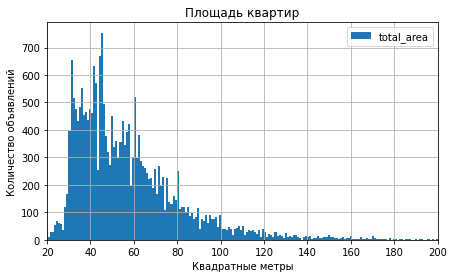

Общее распределение площади квартир:
 count    23040.000000
mean        57.145307
std         24.672087
min         12.000000
25%         40.000000
50%         51.090000
75%         68.000000
max        200.000000
Name: total_area, dtype: float64
Наибольшые по площади квартиры:
 679      200.0
3440     200.0
12055    200.0
15079    199.2
6509     198.9
10315    198.0
18790    197.2
12922    197.0
20715    196.0
2756     196.0
12835    193.2
21699    193.0
10472    192.1
10822    192.0
19183    190.0
18386    190.0
21338    190.0
13502    190.0
3725     188.0
616      187.3
Name: total_area, dtype: float64


In [17]:
import matplotlib.pyplot as plt
df.plot(kind ='hist', grid=True, y='total_area', bins=200, figsize=(7, 4), xlim=(20, 200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()
print('Общее распределение площади квартир:\n', df['total_area'].describe())
print('Наибольшые по площади квартиры:\n', df['total_area'].sort_values(ascending=False).head(20))


Как мы видим, квартир с большой площадью очень мало, рассмотрев 0.1% случаев, объявлений по возрастанию площади, видно, что эти значения не обязательно рассматривать на графике, если только не сгруппировать их в отдельную группу "Элитная недвижимость".
Так же как видно по графику, максимальное количество объявлений находится в диапазоне от 40 до 60 кв.м. Это самая ходовая площадь квартир.

##### Изучение жилой площади

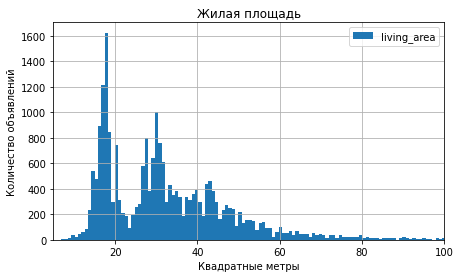

Общее распределение жилой площади квартир:
 count    23040.000000
mean        32.722045
std         16.174673
min          2.000000
25%         18.950000
50%         30.000000
75%         41.538462
max        164.700000
Name: living_area, dtype: float64
Наибольшые по жилой площади квартиры:
 21676    164.7
18790    145.4
4710     142.0
12567    140.0
13729    140.0
3725     139.0
18164    128.0
417      126.6
15647    126.6
15692    125.5
2291     125.5
670      125.0
1067     125.0
3119     124.0
12042    123.6
6980     123.0
10074    123.0
13344    122.1
22803    122.0
3352     122.0
Name: living_area, dtype: float64


In [18]:
df.plot(kind ='hist', grid=True, y='living_area', bins=200, figsize=(7, 4), xlim=(5, 100))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()
print('Общее распределение жилой площади квартир:\n', df['living_area'].describe())
print('Наибольшые по жилой площади квартиры:\n', df['living_area'].sort_values(ascending=False).head(20))

Сравнивая график общей площади и жилой площади, видна закономерность распределений, так же видно два пика около 17 кв.м. и около 30 кв.м., что соответсвует пикам 40 кв.м. и 60 кв.м. скорее всего однокомнатные и двухкомнатные квартиры. Как и подметил в предыдущем выводе "Самые ходовые варианты". 

##### Изучение площади кухни

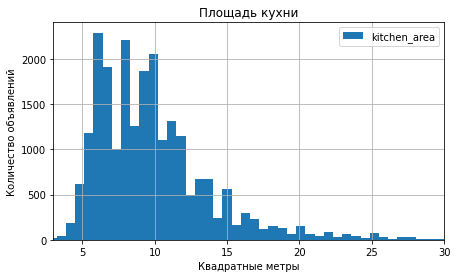

Общее распределение площади кухни:
 count    23040.000000
mean        10.144166
std          4.980094
min          1.300000
25%          7.000000
50%          9.000000
75%         11.600000
max         65.000000
Name: kitchen_area, dtype: float64
Наибольшые по площади кухни:
 22980    65.0
18447    65.0
19499    64.0
15780    64.0
14900    62.5
3561     60.0
20871    58.0
4320     56.2
16964    55.7
17563    54.2
19382    53.0
20499    53.0
8709     51.0
6021     51.0
20636    50.2
656      50.0
5135     50.0
511      50.0
21331    49.4
20284    48.3
Name: kitchen_area, dtype: float64


In [19]:
df.plot(kind ='hist', grid=True, y='kitchen_area', bins=100, figsize=(7, 4), xlim=(3, 30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()
print('Общее распределение площади кухни:\n', df['kitchen_area'].describe())
print('Наибольшые по площади кухни:\n', df['kitchen_area'].sort_values(ascending=False).head(20))

Так же количество слишком больших кухонь мало. Явно виден пик на 6 кв.м., что соответствует старым домам типа: "Ленинградки", "Хрущевки", такие кухни были в квартирах с разным количеством комнат, поэтому их много.  
Далее можно увидеть пик от 8 до 9 кв.м., это уже дома построенные на закате СССР, так называемые "Панельки", в домах такого типа площадь кухни была от 8 до 10 кв.м обычно, так же не зависимо от количества комнат в квартире.

##### Изучение цены объектов

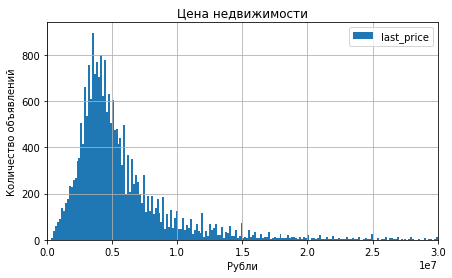

Общее распределение цены недвижимости:
 count    2.304000e+04
mean     5.641604e+06
std      3.854016e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.550000e+06
max      3.000000e+07
Name: last_price, dtype: float64
Наибольшые по цене объекты:
 8044     30000000.0
3298     30000000.0
6421     30000000.0
15940    30000000.0
10390    30000000.0
6509     30000000.0
3680     29999000.0
6922     29999000.0
11530    29999000.0
11151    29990000.0
17378    29990000.0
19773    29900000.0
10654    29900000.0
20977    29849500.0
20775    29800000.0
21143    29800000.0
13113    29500000.0
2414     29500000.0
8275     29375000.0
21734    29370000.0
Name: last_price, dtype: float64


In [20]:
df.plot(kind ='hist', grid=True, y='last_price', bins=200, figsize=(7, 4), xlim=(0, 30000000))
plt.title('Цена недвижимости')
plt.xlabel('Рубли')
plt.ylabel('Количество объявлений')
plt.show()
print('Общее распределение цены недвижимости:\n', df['last_price'].describe())
print('Наибольшые по цене объекты:\n', df['last_price'].sort_values(ascending=False).head(20))

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

Как видно пик количества объявлений 3.7 миллиона рублей.  
Диапазон от 2.5 до 5 миллиона рублей содержит в себе самое большое количество объявлений.  
Недвижимость самая дорогая имеет очень маленькое количество объявлений, неадекватно дорогая "Элитная недвижимость", которая не влияет на общее распределение.

##### Изучение количества комнат

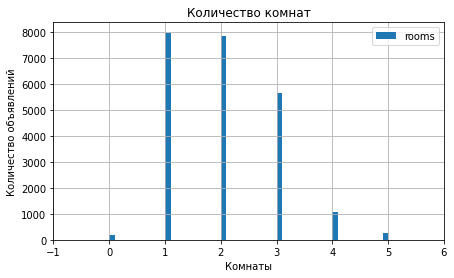

In [21]:
df.plot(kind ='hist', grid=True, y='rooms', bins=50, figsize=(7, 4), xlim=(-1, 6))
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество объявлений')
plt.show()

Как и предполагал ранее, однокомнатные и двухкомнатные квартиры самые ходовые, далее идут трехкомнатные.  
Количество объявлений сильно снижается в зависимости от количества комнат.  

##### Изучение высоты потолков

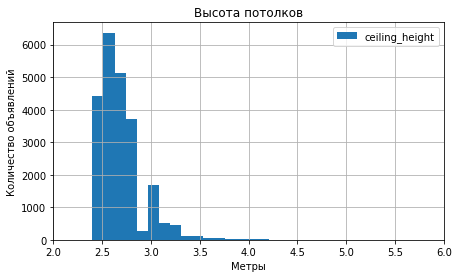

Общее распределение высоты потолков:
 count    23040.000000
mean         2.698985
std          0.223336
min          2.400000
25%          2.550000
50%          2.650000
75%          2.750000
max          5.800000
Name: ceiling_height, dtype: float64
Наибольшые по высоте потолков объекты:
 21227    5.80
12628    5.30
22267    5.00
23153    5.00
638      5.00
1053     5.00
8630     5.00
17075    5.00
2802     4.80
19142    4.70
6802     4.50
10159    4.50
14519    4.50
2823     4.50
3067     4.50
11651    4.40
4201     4.37
10754    4.30
17078    4.25
7279     4.20
Name: ceiling_height, dtype: float64


In [22]:
df.plot(kind ='hist', grid=True, y='ceiling_height', bins=30, figsize=(7, 4), xlim=(2, 6))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество объявлений')
plt.show()
print('Общее распределение высоты потолков:\n', df['ceiling_height'].describe())
print('Наибольшые по высоте потолков объекты:\n', df['ceiling_height'].sort_values(ascending=False).head(20))

Самое большое количество недвижимости находится в диапазон высоты потолков от 2.4 до 2.75, это стандартная высота потолков в старых квартирах и новостройках, далее видим небольшой пик в 1800 объявлений около 3.2 метров, возможно это квартиры комфорт класса.  
Количество объявлений с высотой потолков свыше 3.5 м крайне мало.

##### Изучение этажа квартиры

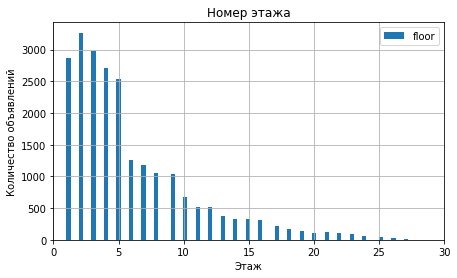

Общее распределение высоты этажей:
 count    23040.000000
mean         5.900521
std          4.894033
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64
Наибольшые по высоте этажа объекты:
 18218    33
11575    32
18629    31
1917     30
11079    29
16644    27
12888    27
6157     27
7711     27
23292    27
4091     27
13276    27
2629     27
113      27
8496     27
19142    26
2026     26
5749     26
18180    26
18183    26
Name: floor, dtype: int64


In [23]:
df.plot(kind ='hist', grid=True, y='floor', bins=100, figsize=(7, 4), xlim=(0, 30))
plt.title('Номер этажа')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.show()
print('Общее распределение высоты этажей:\n', df['floor'].describe())
print('Наибольшые по высоте этажа объекты:\n', df['floor'].sort_values(ascending=False).head(20))

Как видно от 1го до 5го самое больше количество объявлений, потому что есть дома, в которых только 5 этажей.  
Так же видно, что в этом распределении, если сгруппировать дома, в которых свыше 15 этажей в группу "Новостройки", количество объявлений будет достаточным для того, чтобы повлиять на вывод.

##### Изучение типа этажа квартиры

<AxesSubplot:ylabel='floor'>

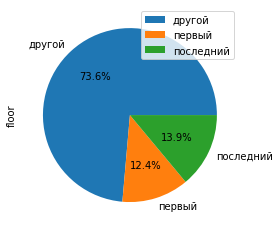

In [24]:
df.groupby(['floor_type']).count().plot(kind='pie', y='floor', autopct='%1.1f%%')

Как видно большее количество объявлений "средних" этажей, так же видно, что первые и последние этажи встречаются в равном количестве.  
Интересно рассмотреть зависимость типа этажа от срока размещения объявления и стоимости

##### Изучение общего количества этажей в домах

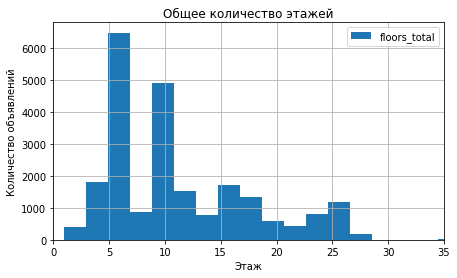

Общее распределение высоты этажей:
 count    23040.000000
mean        10.751345
std          6.618407
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
Наибольшые по высоте этажа объекты:
 2253     60
16731    52
5807     36
11079    36
18617    35
1060     35
18218    35
5808     35
2966     35
20938    35
13975    35
18629    35
12960    35
8496     35
21599    35
14347    35
15982    35
4855     35
12888    35
5749     35
Name: floors_total, dtype: int64


In [25]:
df.plot(kind ='hist', grid=True, y='floors_total', bins=30, figsize=(7, 4), xlim=(0, 35))
plt.title('Общее количество этажей')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.show()
print('Общее распределение высоты этажей:\n', df['floors_total'].describe())
print('Наибольшые по высоте этажа объекты:\n', df['floors_total'].sort_values(ascending=False).head(20))

Как и было сказано ранее в предудущих выводах, самое большое количество объявлений с высотой домов 5-6 этажей, это старые дома "Хрещевки" и "Сталинки" 6700 объявлений, далее идут "Панельки" 9-10 этажей со вторым пиком 5000 обявлений.  
Далее более новые дома распределены с количеством объявлений от 500 до 1800.  
Виден небольшой скачек в 24 объявления на количестве этажей 35, видимо, это в одном доме/жилом комплексе продавались квартиры.

##### Изучение расстояния до центра города, до ближайшего парка, до ближайшего аэропорта

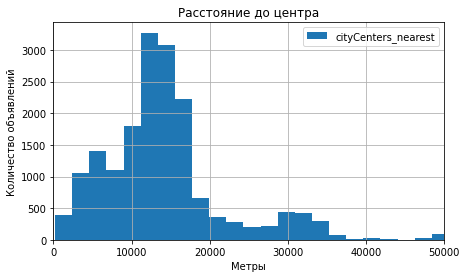

Количество пропусков в столбце "Расстояние до центра":
 5467


In [26]:
df.plot(kind ='hist', grid=True, y='cityCenters_nearest', bins=30, figsize=(7, 4), xlim=(0, 50000))
plt.title('Расстояние до центра')
plt.xlabel('Метры')
plt.ylabel('Количество объявлений')
plt.show()
print('Количество пропусков в столбце "Расстояние до центра":\n', df['cityCenters_nearest'].isna().sum())

Почти четверть значений пропущены, возможно это из-за того, что объекты этих объявлений находятся в поселках/деревнях.  
Самое большое количество значений расположено в диапазоне 10-17 км от центра, это окраина города и близлежащие районы/города за "КАД"ом.

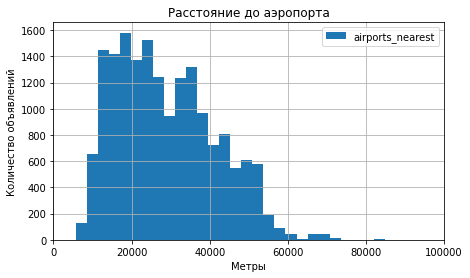

Количество пропусков в столбце "Расстояние до аэропорта":
 5487


In [27]:
df.plot(kind ='hist', grid=True, y='airports_nearest', bins=30, figsize=(7, 4), xlim=(0, 100000))
plt.title('Расстояние до аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество объявлений')
plt.show()
print('Количество пропусков в столбце "Расстояние до аэропорта":\n', df['airports_nearest'].isna().sum())

Так же как и в предыдущем случае, пропущена четверть значений, скорее всего связано с тем же, что находится очень далеко.  
Расстояние от центра Санкт-Петербурга до Пулково 21 км (по данным яндекс карт), большая часть распределения как раз находиться вокруг этого значения.


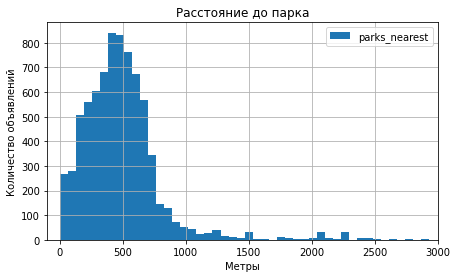

Количество пропусков в столбце "Расстояние до парка":
 15360


In [28]:
df.plot(kind ='hist', grid=True, y='parks_nearest', bins=50, figsize=(7, 4), xlim=(-100, 3000))
plt.title('Расстояние до парка')
plt.xlabel('Метры')
plt.ylabel('Количество объявлений')
plt.show()
print('Количество пропусков в столбце "Расстояние до парка":\n', df['parks_nearest'].isna().sum())

Количество пропусков 60%, что вызвано тем, что парков поблизости нет у этого количества объявлений.  
Расстояние до парка указали в большинстве своем те объявления, у которых парк находится близко от 0 до 1км.  
От 1.5 км до 3км совсем небольшой процент объявлений.


##### Изучение дня недели и месяца публикации объявлений

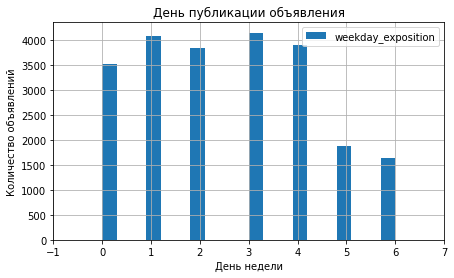

In [29]:
df.plot(kind ='hist', grid=True, y='weekday_exposition', bins=20, figsize=(7, 4), xlim=(-1, 7))
plt.title('День публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.show()

<AxesSubplot:ylabel='days_exposition'>

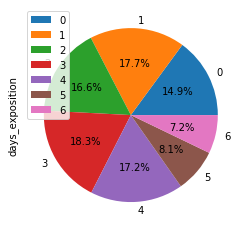

In [30]:
df.groupby(['weekday_exposition']).count().plot(kind='pie', y='days_exposition', autopct='%1.1f%%')

Как видно из круговой диаграммы и гистограмма, только в выходные дни количество новых объявлений уменьшается в два раза.  
Потому что это выходные дни, не рабочие, часть риелторов может не работать, либо показывать ранее выложенные объекты и не добавлять новые объявления.

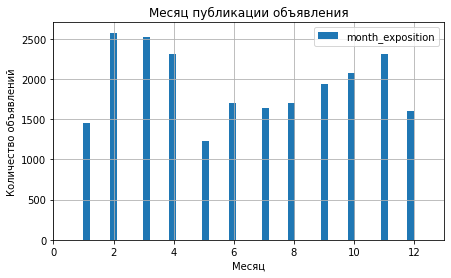

In [31]:
df.plot(kind ='hist', grid=True, y='month_exposition', bins=50, figsize=(7, 4), xlim=(0, 13))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.show()

<AxesSubplot:ylabel='days_exposition'>

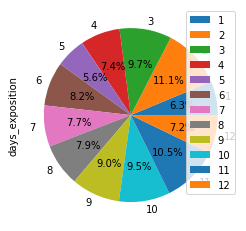

In [32]:
df.groupby(['month_exposition']).count().plot(kind='pie', y='days_exposition', autopct='%1.1f%%')

Как видно из круговой диаграммы и гистограмма, всплеск количества объявлений мы видим февраль-апрель.  
В январе все еще отходят от празников, поэтому количество объявлений небольшое, да и количество праздничных дней в среднем 10, те никто не работает в эти дни.  
Второй всплеск появления новых объявлений наблюдается под конец года сентябрь - ноябрь, тоже легко объяснить.  
Летом люди на дачах, в отпусках, поэтому не очень хотят заниматься продажей квартир.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! Отдельный плюс за то, что ты подписываешь графики и их оси
</div>

#### Изучение скорости продажи квартиры(сколько объявление было активно)

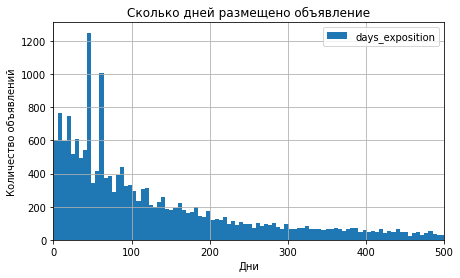

Общее распределение дней размещения:
 count    20000.000000
mean       178.652650
std        217.376621
min          1.000000
25%         44.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64
Количество объявлений больше 100 дней:
 total_images              9630
last_price                9630
total_area                9630
first_day_exposition      9630
rooms                     9630
ceiling_height            9630
floors_total              9630
living_area               9630
floor                     9630
is_apartment              9630
studio                    9630
open_plan                 9630
kitchen_area              9630
balcony                   9630
locality_name             9630
airports_nearest          7414
cityCenters_nearest       7425
parks_around3000          9630
parks_nearest             3343
ponds_around3000          9630
ponds_nearest             3748
days_exposition           9630
price_one_meter           

In [33]:
df.plot(kind ='hist', grid=True, y='days_exposition', bins=300, figsize=(7, 4), xlim=(0, 500))
plt.title('Сколько дней размещено объявление')
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')
plt.show()
print('Общее распределение дней размещения:\n', df['days_exposition'].describe())
print('Количество объявлений больше 100 дней:\n', df.query('days_exposition > 100').count())

Медианное значение равно 95 дней(три месяца), а среднее значение равно 180 дней(полгода).  
Среднее значение так сильно смещено относительно медианного, потому что половина объявлений (9630) активно более 100 дней и распределение их тянется до 1580, на 75% (правый ус) больше медианного значения в два раза.  
Половина всех объектов все таки продаются за полгода и быстрее.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

#### Проверка влияния на стоимость различных факторов

##### Влияние общей площади

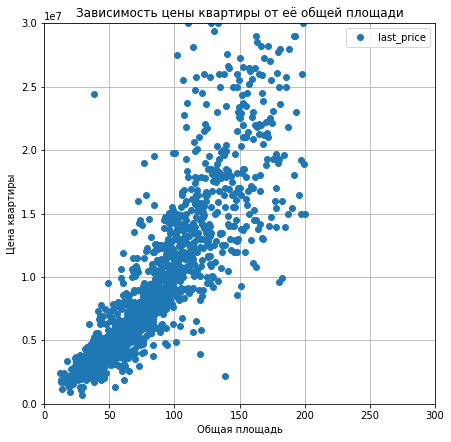

Коэффициент Пирсона: 

0.782461856062099


In [34]:
(
    df.pivot_table(index='total_area', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(7, 7), xlim=(0, 300), ylim=(0, 30000000))
)
plt.title('Зависимость цены квартиры от её общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена квартиры')
plt.show()

print('Коэффициент Пирсона:','\n')
print(df['total_area'].corr(df['last_price']))

Чтобы было лучше видно освновную массу объявлений, исключил аномально большие значение ("Элитную недвижимость").  
По коэффициенту Пирсона видно, что зависимость между общей площадью и ценой квартиры есть, но не всегда, потому что на цену квартиры могут влиять и другие факторы!

In [35]:
print(df.pivot_table(index='rooms', values=['total_area', 'last_price'], aggfunc='median').corr())

            last_price  total_area
last_price      1.0000      0.9962
total_area      0.9962      1.0000


Если почитать коэффицент Пирсона по медианному значению цены и площади, то зависимость становиться прямой.  
Это нужно для наглядности того, что для каждой площади существует разброс значений цены

##### Влияние жилой площади

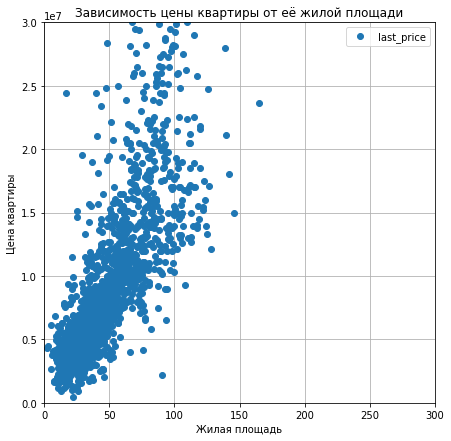

Коэффициент Пирсона: 

0.6732942252011449


In [36]:
(
    df.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(7, 7), xlim=(0, 300), ylim=(0, 30000000))
)
plt.title('Зависимость цены квартиры от её жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена квартиры')
plt.show()

print('Коэффициент Пирсона:','\n')
print(df['living_area'].corr(df['last_price']))

Так же были убраны большие значения, график построим в одном масштабе, чтобы проследить изменение.  
Общеем распределение выглядит так же, как и зависимость от общей площади, но так же видно, что график поворачивает в сторону оси y, что сигнализирует об уменьшении корреляции, но она присутствует.  
Если после этого, предположения вывести коэффициент Пирсона, то видно, что действительно зависимость уменьшилась.

In [37]:
print(df.pivot_table(index='rooms', values=['living_area', 'last_price'], aggfunc='median').corr())

             last_price  living_area
last_price     1.000000     0.994061
living_area    0.994061     1.000000


Если почитать коэффицент Пирсона по медианному значению цены и площади, то зависимость становиться прямой.
Это нужно для наглядности того, что для каждой площади существует разброс значений цены

##### Влияние площади кухни

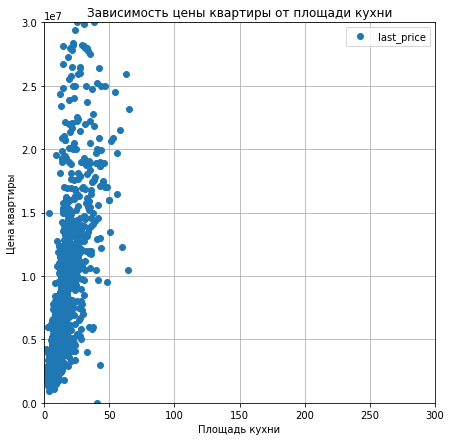

Коэффициент Пирсона: 

0.6156401373466811


In [38]:
(
    df.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(7, 7), xlim=(0, 300), ylim=(0, 30000000))
)
plt.title('Зависимость цены квартиры от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена квартиры')
plt.show()

print('Коэффициент Пирсона:','\n')
print(df['kitchen_area'].corr(df['last_price']))

Так же были убраны большие значения, график построим в одном масштабе, чтобы проследить изменение.  
Общеем распределение выглядит так же, как и зависимость от общей площади, но так же видно, что график поворачивает в сторону оси y, что сигнализирует об уменьшении корреляции, но она присутствует.
Если после этого, предположения вывести коэффициент Пирсона, то видно, что действительно зависимость уменьшилась.

In [39]:
print(df.pivot_table(index='rooms', values=['kitchen_area', 'last_price'], aggfunc='median').corr())

              kitchen_area  last_price
kitchen_area      1.000000    0.922941
last_price        0.922941    1.000000


Площади кухонь стандартная в большинстве квартир, так что если взять медианные значение, коэффициент Пирсона увеличивается значительно и зависимость выглядит более явной

##### Влияние количества комнат

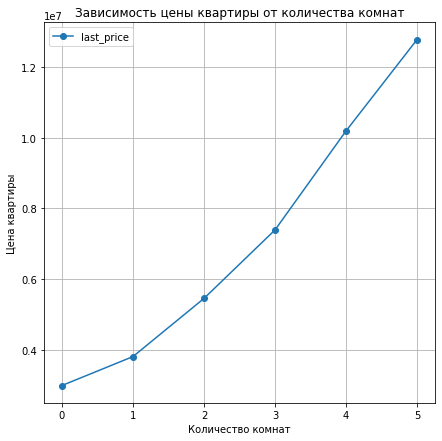

Коэффициент Пирсона: 

0.4800130842571072


In [40]:
(
    df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.title('Зависимость цены квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена квартиры')
plt.show()

print('Коэффициент Пирсона:','\n')
print(df['rooms'].corr(df['last_price']))

По общему коэффициенту Пирсона взаимосвязь есть, но она совсем не явная.  
По графику видно, что цена растет от количества комнат.  
Возможно, потому что количество комнат может быть большим, а площадь небольшой относительно этого количества.

##### Влияние тип этажа

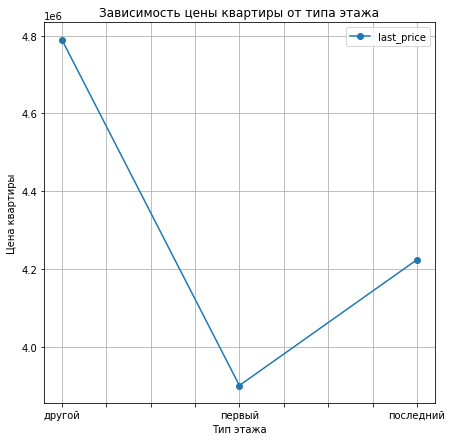

In [41]:
(
    df.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.title('Зависимость цены квартиры от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена квартиры')
plt.show()

Построим график по сгруппированным медианным значениям, видно, что самая низка цена на первый этаж в домах, а самая высокая цена на "средние" этажи.

##### Влияние даты, месяца, года размещения объявления


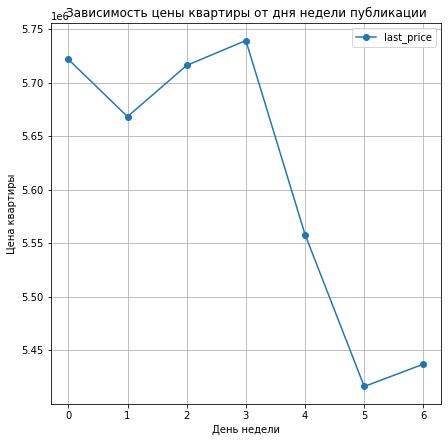

In [42]:
(
    df.pivot_table(index='weekday_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.title('Зависимость цены квартиры от дня недели публикации')
plt.xlabel('День недели')
plt.ylabel('Цена квартиры')
plt.show()

Никакой линейной зависимости между днем недели и ценой квартиры нет, это очень хорошо видно по графику.  
Есть как скачки на графике так и падения.

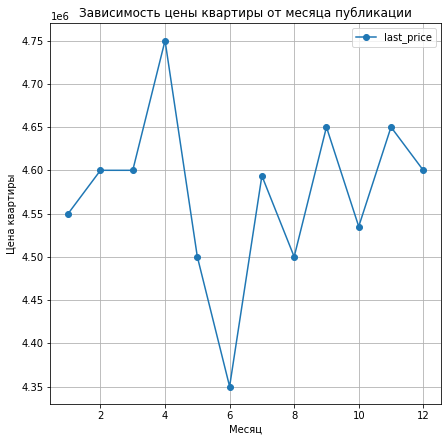

In [43]:
(
    df.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.title('Зависимость цены квартиры от месяца публикации')
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры')
plt.show()

Линейной корреляции нет. Но видно, что есть скачки цены, а есть спады.  
Ранее в пункту 4.1.11 изучали зависимость количества объявлений от месяца публикации, на графике так же виден скачек в районе март-апрель, сильный спад летом, потому что рынок недвижимости становиться менее активный в это время, а после осенью опять цены поднимается так же, как и интерес к покупке-продаже

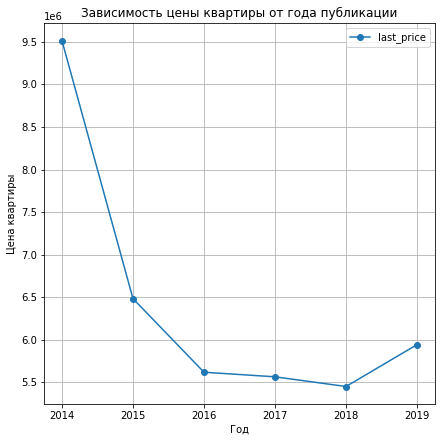

Количество объявлений в каждом году:
                 last_price
year_exposition            
2014                    128
2015                   1112
2016                   2667
2017                   7981
2018                   8342
2019                   2810


In [44]:
(
    df.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.title('Зависимость цены квартиры от года публикации')
plt.xlabel('Год')
plt.ylabel('Цена квартиры')
plt.show()
print('Количество объявлений в каждом году:')
print(df.pivot_table(index='year_exposition', values='last_price', aggfunc='count'))

Линейной корреляции нет как и в предыдущем исследовании зависимости от месяца размещения.  
Видим по графику, что с 2014 до 2018 цена падала, но количество объявлений росло, скорее всего связано с кризисом начавшимся с 2014 года, ослабление рубля, снижение стоимости квартир, люди в панике продают недвижимость, но это верно только для средней цены за год, т.е могло увеличиться количесто объявлений мелкой недвижимости, а количество "Элитной" уменьшилось.


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Рассчитывать корреляцию Пирсона для дня недели, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно. Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану. Графики у тебя уже есть, поэтому остаётся только удалить расчет корреляции)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Коэффициент Пирсона удален из всех трех исследований
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

#### Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [45]:
top_ten_locality = df.pivot_table(index = 'locality_name', values = 'price_one_meter', aggfunc=['count', 'mean'])
top_ten_locality.columns = ['price_one_meter_count', 'price_one_meter_mean']
print('Топ 10 населенных пунктов по количетву объявлений:')
print(top_ten_locality.sort_values(by='price_one_meter_count', ascending=False).head(10))

Топ 10 населенных пунктов по количетву объявлений:
                   price_one_meter_count  price_one_meter_mean
locality_name                                                 
Санкт-Петербург                    15166         110674.335908
поселок Мурино                       552          85629.568678
поселок Шушары                       439          78551.344545
Всеволожск                           397          68719.320400
Пушкин                               363         103213.468857
Колпино                              337          75333.295801
поселок Парголово                    326          90332.263023
Гатчина                              307          68746.146763
деревня Кудрово                      299          92473.547576
Выборг                               235          58238.143141


Самая высокая стоимость квадратного метра в Санкт-Петербурге, потому что это большой облостной город с развитой инфраструктурой, количество объявлений 15 тысяч, что является 65% всех рассматриваемых данных.    
Самая низкая стоимость квадратного метра в городе Выборг, потому что это самый удаленный населенный пункт из представленных в списке "Топ 10 населенных пунктов по количеству объявлений".  


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

#### Расчет зависимости стоимости квадратного метра недвижимости от расстояния до центра города.

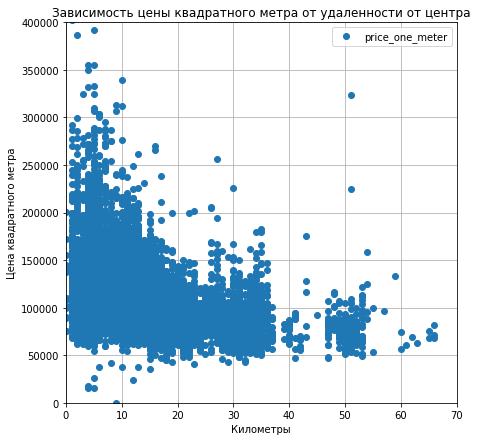

Коэффициент Пирсона: 

                        cityCenters_nearest_km  price_one_meter
cityCenters_nearest_km                1.000000        -0.528029
price_one_meter                      -0.528029         1.000000


In [46]:
df.plot(y='price_one_meter', x='cityCenters_nearest_km', grid=True, style='o', figsize=(7, 7), ylim=(0, 400000), xlim=(0, 70))
plt.title('Зависимость цены квадратного метра от удаленности от центра')
plt.xlabel('Километры')
plt.ylabel('Цена квадратного метра')
plt.show()

print('Коэффициент Пирсона:','\n')
print(df.pivot_table(index='locality_name', values=['price_one_meter', 'cityCenters_nearest_km'], aggfunc='median').corr())

Уже по графику и коэффициенту Пирсона видно, что цена падает по удаленности от центра.  
Расчитаем численное значение.

In [47]:
#dfdf = df.query('locality_name == "Санкт-Петербург"')
average_price_km = (df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index = 'cityCenters_nearest_km', values = 'price_one_meter'))
print('Зависимость цены кв.метра от удаленности от центра:')
print(average_price_km.head(30))

Зависимость цены кв.метра от удаленности от центра:
                        price_one_meter
cityCenters_nearest_km                 
0                         120644.997884
1                         145152.714700
2                         130249.584191
3                         118098.419393
4                         125534.421646
5                         132857.976932
6                         131504.292774
7                         131672.730867
8                         123392.106606
9                         112266.532156
10                        112734.112416
11                        107927.153250
12                        107505.222308
13                        108146.766369
14                        104220.303822
15                        104210.318255
16                        100497.754342
17                         97025.737795
18                         96409.578562
19                         98658.388032
20                        102889.106133
21                         9

Чем ближе к центру города, тем больше стоит квадратный метр, но с большим отдалением значение меняется незначительно.  
Т.е. по значениям видно, что сначала каждый километр может стоить 10-20 тысяч, но после радиуса 10 км, стоимость изменяется намного меньше с каждый километром от 0 до 4 тысяч.  
Соответсвенно, цена средней квартиры в "центре" (для Санкт-Петербурга можно считать радиус около 6-7 км)  
и "на окраине" (13-14 кмно внутри КАД), в среднем отличается в 1.3 раза. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

### Общий вывод

В начале проекты были изучены данные. В результате предобработки были изменены типы данных в столбцах, которые этого требовали, заменены пропущеные значения в данных, где это было целесообразно и возможно, либо были удалены строки. Так же устранены аномальные значения в столбцах "Высота потолков", в столбце "Название населенного пункта" значения приведены к общим наименованиям.  
  
После предобработки были добавлены дополнительные столбцы: "Цена одного квадратного метра", "День недели публикации объявления", "Месяц публикации объявления", "Год публикации объявления", "Тип этажа", "Расстояние до центра города в км". Это было нужно, чтобы изучить зависимости интересующие нас в исследовательском анализе.  
  
В результате исследователького анализа было выяснено:
1. Больше всего на цену квартиры влияет общая площадь и площадь кухни, наибольшее количество объявлений в диапазоне 40-60 кв.м;
2. Стоимость самой продоваемой квартиры (большее количество объявлений), находится в диапазоне 4.5-6 миллионов;
3. 90% объявлений о продаже однокомнатных, двухкомнатных и трехкомнатных квартир,  влияние этажа на цену средней квартиры есть, но зависимость на прямая;
4. Чаще продают "вторичку" (квартиры в старых домах 5ти, 9-12ти этажных домах);
5. В субботу и воскресенье публикуют меньшее количество объявлений, чем в другие дни;
6. В декабре, январе и в летний период: май, июнь, июль, август, публикуют меньше объявлений;
7. Корреляции между месяцем, днем недели, годом и ценой квартиры нет;
8. Самый дорогой средний кв.м. в Санкт-Петербурге, он равен 115 тысяч, чем дальше от Санкт-Петербурга находится населенный пункт, тем меньше там стоит кв.м.;
9. Зависимость стоимости кв.м. в Санкт-Петербурге от расстояние до центра видна отрицательная корреляция, т.е чем дальше от центра города, тем дешевле кв.м.
10. На первом этаже продаются самые дешевые квартиры, если рассматривать зависимость от этажа.


<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- отбросить аномальные значения 
<br>- удалить расчет корреляции для времени продажи

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Комментарии учтены, задания исправлены
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b> 
<br>Необходимо поправить:
<br>- отбросить аномальные значения 

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
<br> Аномальные значения выделены и удалены из общих данных.
<br> Благодря этому поменялись некоторые данные, разница между средним и медианным значение сократилась до минимума.
<br> Коэффициенты Пирсона увеличились в зависимостях Стоимость квартиры - общая площадь, жилая площадь, площадь кухни, количество комнат, потому что мы убрали слишком большие значения.
<br> Так же исправлены выводы в изучении площадей, цены, количества комнат и в проверке влияния площади, количества комнат.
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v3:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод